INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 200, 'communication_type': 'temp1', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'naive'}


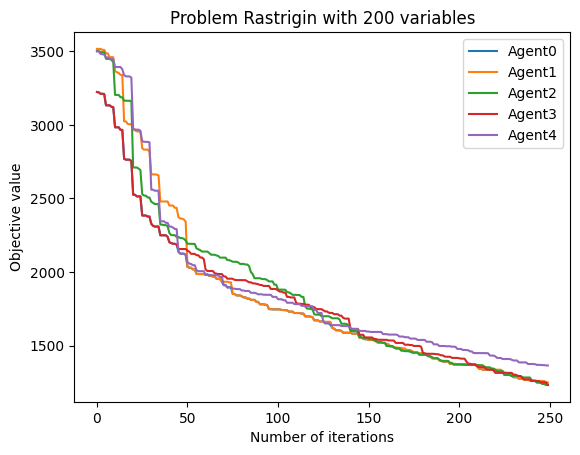

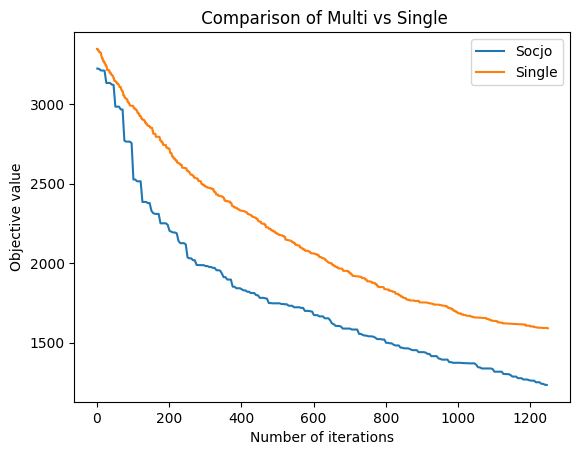

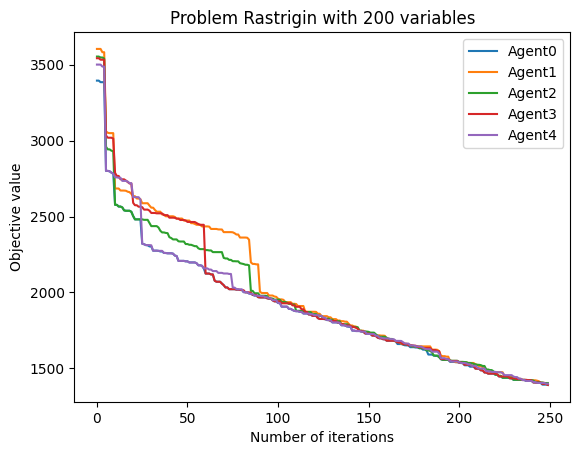

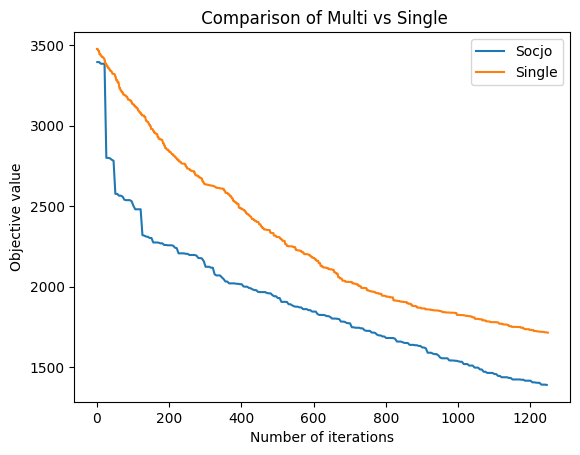

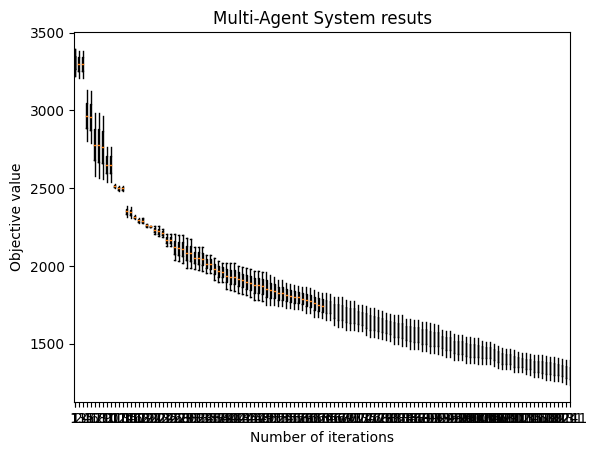

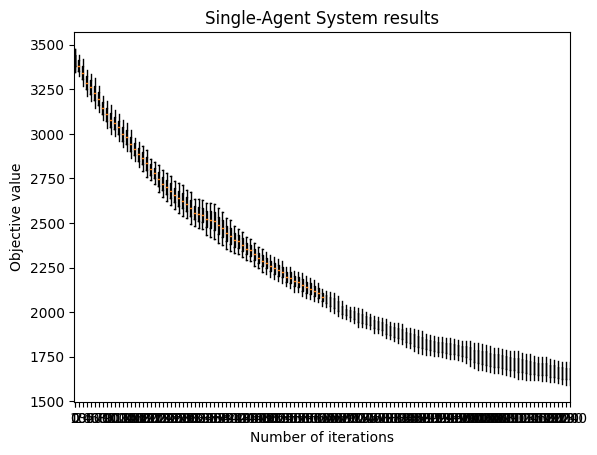

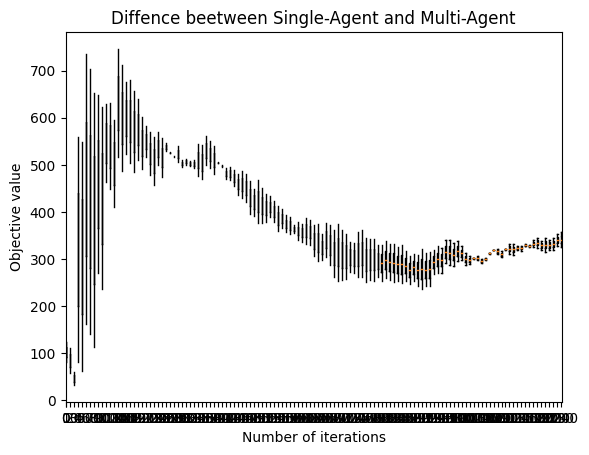

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()
with open("config.json","r") as f:
    settings = Settings(f)

logging.basicConfig(level=settings.log_level)
logging.info(settings.json_settings)
config = settings.decodeAgentsData()


Agents, Agent_Reference = create_agents_float_solution(config)

runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference)



Statistic_runner = StatisticRunner(runner)
run_next = True
runs = 0
# while run_next:


Statistic_runner.run_an_collect_data(no_runs = 2, cycles=600 , cycle_iter=30, num_of_comm=3 )
# passed_time = (time() - time1)/60
# runs += 1
# if (settings.maxtime - passed_time ) <  passed_time/runs*1.2:
#     run_next = False
# logging.info(f"Passed time : {passed_time}")

# Statistic_runner.save_progres()
if settings.enable_plots:
    Statistic_runner.plot()



AttributeError: 'Agent' object has no attribute 'trust_dict'